**Modelo de predicción de RF para el par ETHBTC intervalo de 1d**

# Importaciones

In [ ]:
#Installing Python modules
!pip install fastai==0.7.0
!pip install scikit-learn==0.21.3

#Data manipulation
import pandas as pd
import numpy as np
from time import time
import datetime

#Importing deep learning librery
from fastai.imports import *
from fastai.tabular import *

#Import packages
import math, re, IPython, graphviz

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from pprint import pprint

#Importing automatic learning packages
from sklearn import metrics , tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble._forest import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import train_test_split , RandomizedSearchCV

from IPython.display import Image , display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 6.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<0.4 (from fastai) (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1)
ERROR: No matching distribution found for torch<0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × pyt

# Captura de datos (Con CSV)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ETH_day.csv to ETH_day.csv
User uploaded file "ETH_day.csv" with length 92479 bytes


In [ ]:
df = pd.read_csv("ETH_day.csv")
df.index = df['timestamp']
df['y']=df['close']

In [ ]:
df.drop(df.head(0).index,inplace=True)

In [ ]:
print(df.info())
print('\n')
print("Número de muestras:", df.shape[0])
print("Número de variables:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 1438 entries, 5/9/2016 to 4/15/2020
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1438 non-null   object 
 1   symbol      1438 non-null   object 
 2   open        1438 non-null   float64
 3   high        1438 non-null   float64
 4   low         1438 non-null   float64
 5   close       1438 non-null   float64
 6   Volume ETH  1438 non-null   float64
 7   Volume USD  1438 non-null   float64
 8   ignore      1438 non-null   int64  
 9   y           1438 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 123.6+ KB
None


Número de muestras: 1438
Número de variables: 10


In [ ]:
#df.shape
#df['open'] = df['open']
#df['high'] = df['high']
#df['low'] = df['low']
#df['close'] = df['close']
#df['y'] = df['y']
df.describe()
#df.count()
#df.tail()



,open,high,low,close,Volume ETH,Volume USD,ignore,y
count,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03,1.438000e+03,1438.0,1438.000000
mean,239.397149,248.919200,227.681446,239.468011,3.720638e+04,1.139557e+07,0.0,239.468011
std,237.662224,248.677428,222.794938,237.606382,6.908336e+04,2.143780e+07,0.0,237.606382
min,6.770000,7.290000,5.990000,6.770000,0.000000e+00,0.000000e+00,0.0,6.770000
25%,79.782500,84.875000,74.677500,80.732500,7.020215e+03,7.541171e+05,0.0,80.732500
50%,181.430000,187.020000,175.850000,181.430000,1.780439e+04,3.221372e+06,0.0,181.430000
75%,297.735000,306.015000,287.427500,297.502500,4.204451e+04,1.204918e+07,0.0,297.502500
max,1381.850000,1420.010000,1270.000000,1381.850000,1.827755e+06,2.221193e+08,0.0,1381.850000


In [ ]:
df_small = df
features = ['open', 'high', 'low', 'close']

X_df = df_small[features]
y_df = df_small['y']

In [ ]:
# Correlaciones entre variables
df.drop([ 'ignore' ], axis='columns', inplace=True)
df.corr()

<ipython-input-8-36945801fda4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,open,high,low,close,Volume ETH,Volume USD,y
open,1.000000,0.998359,0.995446,0.996012,0.161654,0.672002,0.996012
high,0.998359,1.000000,0.995101,0.998298,0.170887,0.686361,0.998298
low,0.995446,0.995101,1.000000,0.997042,0.138174,0.626964,0.997042
close,0.996012,0.998298,0.997042,1.000000,0.158693,0.665275,1.000000
Volume ETH,0.161654,0.170887,0.138174,0.158693,1.000000,0.511953,0.158693
Volume USD,0.672002,0.686361,0.626964,0.665275,0.511953,1.000000,0.665275
y,0.996012,0.998298,0.997042,1.000000,0.158693,0.665275,1.000000


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_val.shape)
print('Testing Labels Shape:', y_val.shape)

Training Features Shape: (1150, 4)
Training Labels Shape: (1150,)
Testing Features Shape: (288, 4)
Testing Labels Shape: (288,)


# OOB

OOB es el error de predicción media de cada muestra de la formación xᵢ , utilizando sólo los árboles que no tenían xᵢ en su muestra de arranque.

Se buscará una prueba del OOB error. Para ello, contaremos con todas las observaciones de forma desornedada y con un 1% de datos de validación, de tal forma que los datos más recientes pertenezcan al Set de entrenamiento.

In [ ]:
X_trainOOB, X_valOBB, y_trainOBB, y_valOBB = train_test_split(X_df, y_df, test_size=0.01, random_state=42, shuffle=True)

In [ ]:
OOB_model = RandomForestRegressor (n_estimators=10, bootstrap=True,  oob_score=True, random_state=42)
OOB_model.fit(X_trainOOB, y_trainOBB)
OOB_model.oob_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.9729916925346531

In [ ]:
OOB_model = RandomForestRegressor (n_estimators=100, bootstrap=True,  oob_score=True, random_state=42)
OOB_model.fit(X_trainOOB, y_trainOBB)
OOB_model.oob_score_

0.9997106819421763

In [ ]:
OOB_model = RandomForestRegressor (n_estimators=300, bootstrap=True,  oob_score=True, random_state=42)
OOB_model.fit(X_trainOOB, y_trainOBB)
OOB_model.oob_score_

0.9997039925646364

In [ ]:
OOB_model = RandomForestRegressor (n_estimators=500, bootstrap=True,  oob_score=True, random_state=42)
OOB_model.fit(X_trainOOB, y_trainOBB)
OOB_model.oob_score_

0.999705269938665

# Modelo por defecto

In [ ]:
#Functions to evaluate models (RMSE and R² of training and validation set)

def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train),
                m.score(X_val, y_val)]
    print(f"RMSE training set: {res[0]} \nRMSE validation set: {res[1]} \nR² training set: {res[2]} \nR² validation set: {res[3]}")

In [ ]:
default_model = RandomForestRegressor(random_state=42)
default_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
print_score(default_model)

RMSE training set: 1.7971615715222542 
RMSE validation set: 0.4765777234909067 
R² training set: 0.9999532880324469 
R² validation set: 0.9998684305531667


# Modelo con árboles y mínimo de muestras en nodo modificado

In [ ]:
modified_trees_leaf_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=25,  random_state=42)
modified_trees_leaf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=25, n_estimators=40, random_state=42)

In [ ]:
print_score(modified_trees_leaf_model)

RMSE training set: 35.5140774190341 
RMSE validation set: 4.285624821468208 
R² training set: 0.9817587335276056 
R² validation set: 0.9893606310537096


# Modelo con profundidad modificada

In [ ]:
modified_depth_model = RandomForestRegressor(n_estimators=30, max_depth=20,  random_state=42)
modified_depth_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=30, random_state=42)

In [ ]:
print_score(modified_depth_model)

RMSE training set: 1.6620061770524255 
RMSE validation set: 0.5303222258160089 
R² training set: 0.9999600497795096 
R² validation set: 0.9998370826904187


# Modelo con mayor número de árboles y misma profundidad

In [ ]:
modified_depth_and_trees_model = RandomForestRegressor(n_estimators=100, max_depth=14,  random_state=42)
modified_depth_and_trees_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, random_state=42)

In [ ]:
print_score(modified_depth_and_trees_model)

RMSE training set: 1.7207096909410595 
RMSE validation set: 0.49329634419327206 
R² training set: 0.9999571777854833 
R² validation set: 0.9998590375738864


# Errors modifying nº trees

In [ ]:
# Return MAE, MRSE, R²
def reg_acc(y_true, y_pre):
    return_var = []
    from math import sqrt
    rmse = sqrt(mean_squared_error(y_true,y_pre))
    return_var.append(rmse)
    print ("RMSE: ",rmse )
    r2 = r2_score(y_true,y_pre)
    return_var.append(r2)
    print ("R²: ",r2 )
    mae = mean_absolute_error(y_true,y_pre)
    return_var.append(mae)
    print ('MAE: ',mae)

    if 0 in y_true :
        print("MAPE can't be calculated")
        return_var.append(0)
    else :
        mape = round(np.mean(np.abs((y_true - y_pre)/y_true))*100,4)
        print ('MAPE :', mape)
        print('============================')
        print('Model Accuracy(%) :', 100-mape)
        print('============================')
        return_var.append(mape)
        return_var.append(100-mape)
    return return_var

In [ ]:
#Looking for the best nº estimators. Parameters by default

random_tree = [i*10 for i in range(1,50)]
rmse , r_sq , mae , mape = [],[],[],[]
for tree_size in random_tree:
    print('Tree Size:', tree_size)
    model = RandomForestRegressor(random_state=42, n_estimators=int(tree_size)).fit(X_train,y_train)
    model.fit(X_train, y_train)
    estimation = model.predict(X_val)
    result = reg_acc(y_val,estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])

Tree Size: 10
RMSE:  0.5500760805965351
R²:  0.9998247197059562
MAE:  0.41152083333333356
MAPE : 0.2326
Model Accuracy(%) : 99.7674
Tree Size: 20
RMSE:  0.49561045060612013
R²:  0.9998577119318758
MAE:  0.3819340277777797
MAPE : 0.2168
Model Accuracy(%) : 99.7832
Tree Size: 30
RMSE:  0.5303222258160089
R²:  0.9998370826904187
MAE:  0.39915856481481643
MAPE : 0.2271
Model Accuracy(%) : 99.7729
Tree Size: 40
RMSE:  0.5047148816531433
R²:  0.9998524362129443
MAE:  0.3802109374999941
MAPE : 0.2166
Model Accuracy(%) : 99.7834
Tree Size: 50
RMSE:  0.4796411495702906
R²:  0.9998667336686443
MAE:  0.3687006944444446
MAPE : 0.2111
Model Accuracy(%) : 99.7889
Tree Size: 60
RMSE:  0.4662934401618423
R²:  0.9998740476764845
MAE:  0.3595150462963012
MAPE : 0.2064
Model Accuracy(%) : 99.7936
Tree Size: 70
RMSE:  0.47572657045962186
R²:  0.9998689000914033
MAE:  0.3684156746031789
MAPE : 0.2107
Model Accuracy(%) : 99.7893
Tree Size: 80
RMSE:  0.47650580628166894
R²:  0.9998684702587299
MAE:  0.369472

<Axes: title={'center': 'RMSE RATE'}, xlabel='Number of Trees', ylabel='RMSE'>

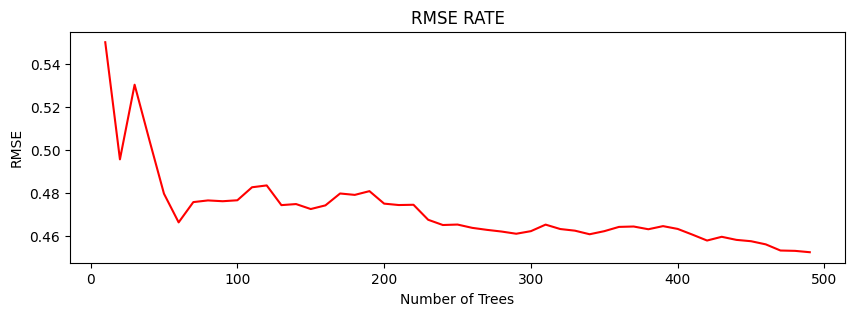

In [ ]:
plt.figure(figsize=(10,3))
plt.title('RMSE RATE')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
sns.lineplot(x=random_tree,y=rmse, color='red')

<Axes: title={'center': 'R² RATE'}, xlabel='Number of Trees', ylabel='R²'>

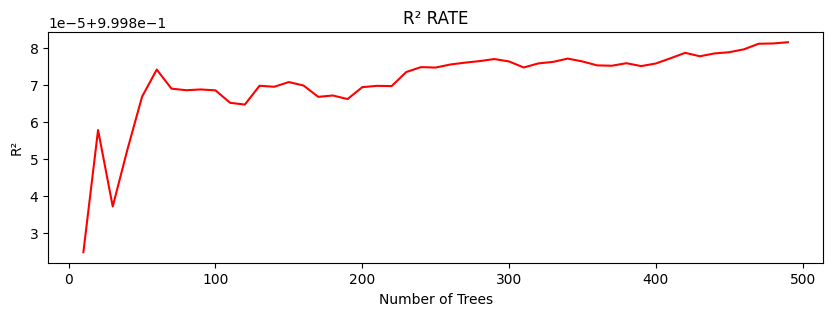

In [ ]:
plt.figure(figsize=(10,3))
plt.title('R² RATE')
plt.xlabel('Number of Trees')
plt.ylabel('R²')
sns.lineplot(x=random_tree,y=r_sq, color='red')

<Axes: title={'center': 'MAPE RATE'}, xlabel='Number of Trees', ylabel='MAPE'>

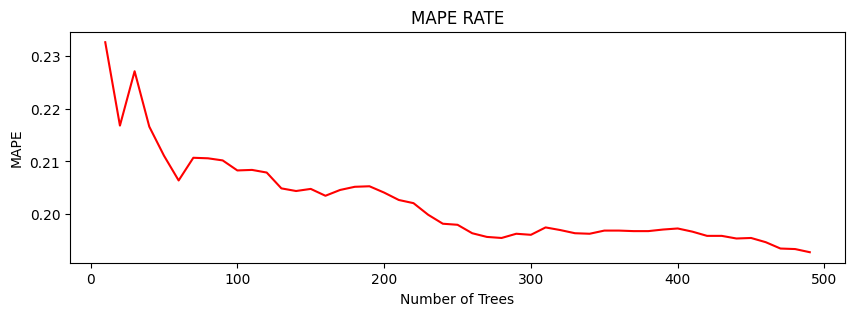

In [ ]:
plt.figure(figsize=(10,3))
plt.title('MAPE RATE')
plt.xlabel('Number of Trees')
plt.ylabel('MAPE')
sns.lineplot(x=random_tree,y=mape, color='red')

<Axes: title={'center': 'MAE RATE'}, xlabel='Number of Trees', ylabel='MAE'>

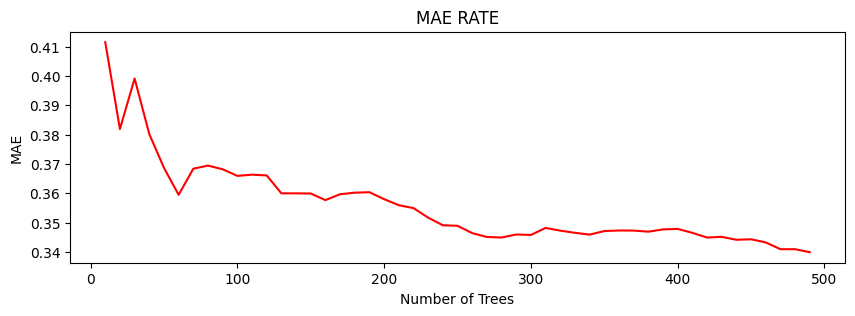

In [ ]:
plt.figure(figsize=(10,3))
plt.title('MAE RATE')
plt.xlabel('Number of Trees')
plt.ylabel('MAE')
sns.lineplot(x=random_tree,y=mae, color='red')

A priori, a partir de los 250 árboles los errores **RMSE, MAPE, MAE** son menores y alcanzan cierta estabilidad. Se plantea contruir el modelo con 250 árboles

# Errors modifying depth

In [ ]:
#Looking for the best nº estimators

random_depth = [i*2 for i in range(1,16)]
rmse , r_sq , mae , mape = [],[],[],[]
for depth_size in random_depth:
    print('Depth Size:', depth_size)
    model_depth = RandomForestRegressor(n_estimators=280,  random_state=42, max_depth=int(depth_size)).fit(X_train,y_train)
    model_depth.fit(X_train, y_train)
    estimation = model_depth.predict(X_val)
    result = reg_acc(y_val,estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])

Depth Size: 2
RMSE:  71.91726540640909
R²:  -1.9960834296197976
MAE:  67.40134025654771
MAPE : 40.6261
Model Accuracy(%) : 59.3739
Depth Size: 4
RMSE:  9.302558955449507
R²:  0.9498706083667339
MAE:  7.845557994693441
MAPE : 4.3727
Model Accuracy(%) : 95.6273
Depth Size: 6
RMSE:  1.9454382556709269
R²:  0.9978075864608108
MAE:  1.5566696236650648
MAPE : 0.8635
Model Accuracy(%) : 99.1365
Depth Size: 8
RMSE:  0.5284668752212106
R²:  0.9998382206400039
MAE:  0.41255341396011314
MAPE : 0.2297
Model Accuracy(%) : 99.7703
Depth Size: 10
RMSE:  0.46920523973669925
R²:  0.9998724697301488
MAE:  0.3485468627823792
MAPE : 0.1966
Model Accuracy(%) : 99.8034
Depth Size: 12
RMSE:  0.4622261758628792
R²:  0.9998762353426484
MAE:  0.3406020489358664
MAPE : 0.1928
Model Accuracy(%) : 99.8072
Depth Size: 14
RMSE:  0.46016635659656513
R²:  0.9998773359501439
MAE:  0.34406380208331
MAPE : 0.1955
Model Accuracy(%) : 99.8045
Depth Size: 16
RMSE:  0.46130453762663987
R²:  0.9998767284022259
MAE:  0.3449248

<Axes: title={'center': 'RMSE RATE'}, xlabel='Depth', ylabel='RMSE'>

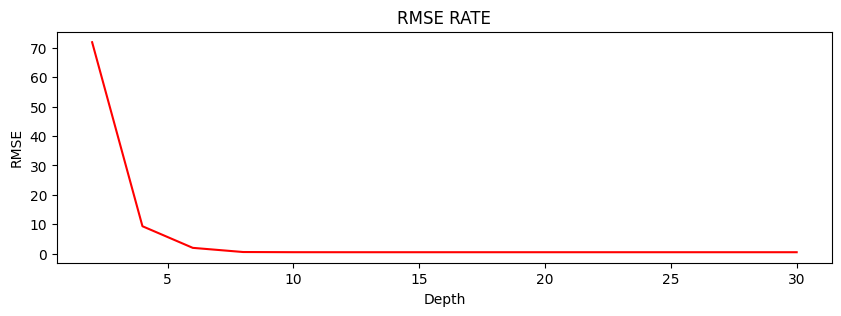

In [ ]:
plt.figure(figsize=(10,3))
plt.title('RMSE RATE')
plt.xlabel('Depth')
plt.ylabel('RMSE')
sns.lineplot(x=random_depth,y=rmse, color='red')

<Axes: title={'center': 'R² RATE'}, xlabel='Depth', ylabel='R²'>

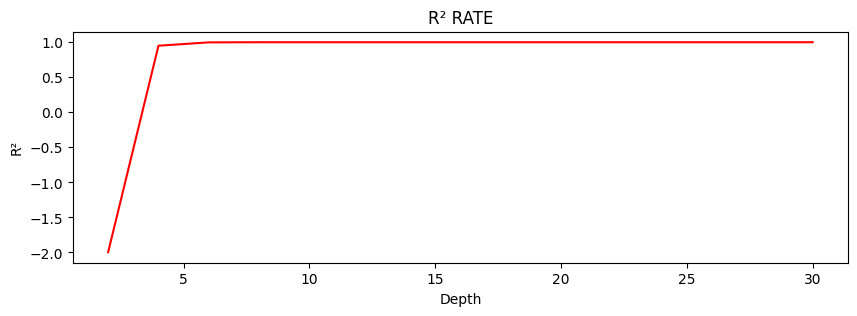

In [ ]:
plt.figure(figsize=(10,3))
plt.title('R² RATE')
plt.xlabel('Depth')
plt.ylabel('R²')
sns.lineplot(x=random_depth,y=r_sq, color='red')

<Axes: title={'center': 'MAPE RATE'}, xlabel='Depth', ylabel='MAPE'>

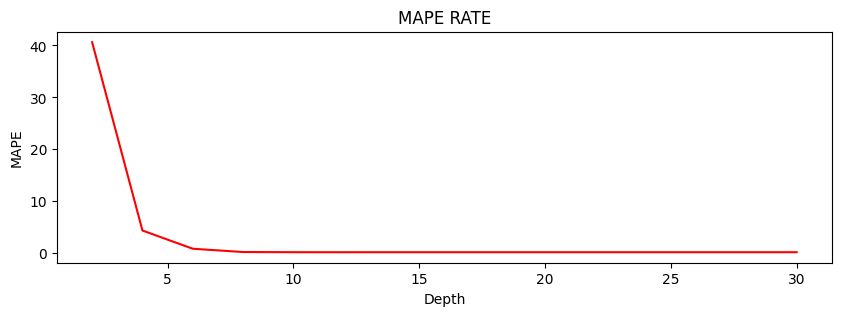

In [ ]:
plt.figure(figsize=(10,3))
plt.title('MAPE RATE')
plt.xlabel('Depth')
plt.ylabel('MAPE')
sns.lineplot(x=random_depth,y=mape, color='red')

<Axes: title={'center': 'MAE RATE'}, xlabel='Depth', ylabel='MAE'>

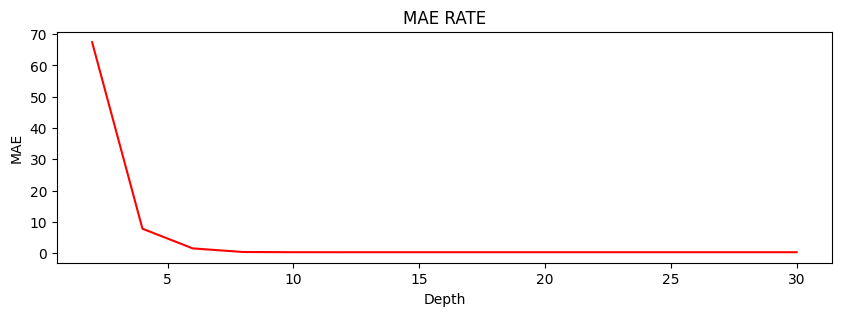

In [ ]:
plt.figure(figsize=(10,3))
plt.title('MAE RATE')
plt.xlabel('Depth')
plt.ylabel('MAE')
sns.lineplot(x=random_depth,y=mae, color='red')

A priori, a partir de una profundidad de 12 los errores RMSE, MAPE, MAE son menores y empiezan a alcanzar estabilidad. Se plantea contruir el modelo con 280 árboles y con una profundidad 12.

# Modelo con 280 árboles y profundidad 12 (en base a los resultados)


In [ ]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train),
                m.score(X_val, y_val)]
    print(f"RMSE training set: {res[0]} \nRMSE validation set: {res[1]} \nR² training set: {res[2]} \nR² validation set: {res[3]}")

In [ ]:
modified_final = RandomForestRegressor(n_estimators=280, max_depth=12, random_state=42)
modified_final.fit(X_train, y_train)

print_score(modified_final)

RMSE training set: 1.5808536372154 
RMSE validation set: 0.4622261758628792 
R² training set: 0.9999638559146559 
R² validation set: 0.9998762353426484


# Random Search with Cross Validation

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 45)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30], 'bootstrap': [True]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring='neg_mean_squared_error',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=False)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 20, 25,
                                                             30],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

**Evaluate the Best Random Search Model**

In [ ]:
best_random = rf_random.best_estimator_

rmse , r_sq , mae , mape = [],[],[],[]
print('Model Performance\n')
print('Tree Size:', best_random.n_estimators)
estimation = best_random.predict(X_val)
result_best = reg_acc(y_val,estimation)
rmse.append(result_best[0])
r_sq.append(result_best[1])
mae.append(result_best[2])
mape.append(result_best[3])

Model Performance

Tree Size: 60
RMSE:  1.8984341862052885
R²:  0.99791224917636
MAE:  1.2298691048004757
MAPE : 0.7034
Model Accuracy(%) : 99.2966


#Grid Search
We will perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,14,16],
    'max_features': ['sqrt','auto'],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2,4,6],
    'n_estimators': [200,280,320]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=False, scoring='neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
best_grid = grid_search.best_estimator_

rmse , r_sq , mae , mape = [],[],[],[]
print('Model Performance\n')
print('Tree Size:', best_grid.n_estimators)
estimation = best_grid.predict(X_val)
result_best_grid = reg_acc(y_val,estimation)
rmse.append(result_best_grid[0])
r_sq.append(result_best_grid[1])
mae.append(result_best_grid[2])
mape.append(result_best_grid[3])

Model Performance

Tree Size: 200
RMSE:  0.4617166467718403
R²:  0.9998765080530184
MAE:  0.34253430286869513
MAPE : 0.1945
Model Accuracy(%) : 99.8055


#Another Round of Grid Search

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [11,13,15,16],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2,4,6],
    'n_estimators': [230,260,300]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid,
                                 cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error', return_train_score=False)

grid_search_final.fit(X_train, y_train);

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 230}

In [ ]:
best_grid_final = grid_search_final.best_estimator_

rmse , r_sq , mae , mape = [],[],[],[]
print('Model Performance\n')
print('Tree Size:', best_grid_final.n_estimators)
estimation = best_grid_final.predict(X_val)
result_best_grid_final = reg_acc(y_val,estimation)
rmse.append(result_best_grid_final[0])
r_sq.append(result_best_grid_final[1])
mae.append(result_best_grid_final[2])
mape.append(result_best_grid_final[3])

Model Performance

Tree Size: 230
RMSE:  1.666611795281883
R²:  0.9983909984061639
MAE:  1.035064452495991
MAPE : 0.5946
Model Accuracy(%) : 99.4054


A very slight improvement in accuracy means we have reached the point of diminishing returns from tuning. We will stop here and use this as our final model.

#Final Model

In [ ]:
final_model = modified_final

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')

rmse , r_sq , mae , mape = [],[],[],[]
print('Model Performance\n')
print('Tree Size:', final_model.n_estimators)
estimation = final_model.predict(X_val)
result_final_model = reg_acc(y_val,estimation)
rmse.append(result_final_model[0])
r_sq.append(result_final_model[1])
mae.append(result_final_model[2])
mape.append(result_final_model[3])


Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 280,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance

Tree Size: 280
RMSE:  0.4622261758628792
R²:  0.9998762353426484
MAE:  0.3406020489358664
MAPE : 0.1928
Model Accuracy(%) : 99.8072


#Comparison of All Improvement Techniques

In [ ]:
# Time used for evaluating model run times
import time

In [ ]:
# Evaluate run time and prediction accuracy
def evaluate_model(model, X_train, y_train, X_val, y_val):
    n_trees = model.get_params()['n_estimators']
    max_depth = model.get_params()['max_depth']
    min_samples_leaf = model.get_params()['min_samples_leaf']
    min_samples_split = model.get_params()['min_samples_split']

    n_features = X_train.shape[1]

    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train, y_train)
        predictions.append(model.predict(X_val))

        end_time = time.time()
        run_times.append(end_time - start_time)

    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)

    # Calculate performance metrics
    rmse , r_sq , mae , mape = [],[],[],[]
    estimation = model.predict(X_val)
    result = reg_acc(y_val,estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])

    # Return results in a dictionary
    results = {'time': run_time, 'RMSE': result[0],'R²': result[1],'MAE': result[2],
               'MAPE': result[3], 'accuracy': 100-result[3], 'n_trees': n_trees, 'n_features': n_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

    return results

**Random Search Best Model**

In [ ]:
random_results = evaluate_model(best_random, X_train, y_train, X_val, y_val)
random_results['model'] = 'best_random'

RMSE:  1.8984341862052885
R²:  0.99791224917636
MAE:  1.2298691048004757
MAPE : 0.7034
Model Accuracy(%) : 99.2966


**First Grid Search Best Model**

In [ ]:
first_grid_results = evaluate_model(best_grid, X_train, y_train, X_val, y_val)
first_grid_results['model'] = 'first_grid'

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RMSE:  0.4617166467718403
R²:  0.9998765080530184
MAE:  0.34253430286869513
MAPE : 0.1945
Model Accuracy(%) : 99.8055


**Second Grid Search Best Model**

In [ ]:
final_model_results = evaluate_model(best_grid_final, X_train, y_train, X_val, y_val)
final_model_results['model'] = 'second_grid'

RMSE:  1.666611795281883
R²:  0.9983909984061639
MAE:  1.035064452495991
MAPE : 0.5946
Model Accuracy(%) : 99.4054


**Primer modelo planteado de RF**

In [ ]:
default_model_results = evaluate_model(default_model, X_train, y_train, X_val, y_val)
default_model_results['model'] = 'default_model'

RMSE:  0.4765777234909067
R²:  0.9998684305531667
MAE:  0.3659645833333254
MAPE : 0.2083
Model Accuracy(%) : 99.7917


**Segundo modelo: modificado nº árboles y min_samples_leaf**

In [ ]:
modified_trees_leaf_model_results = evaluate_model(modified_trees_leaf_model, X_train, y_train, X_val, y_val)
modified_trees_leaf_model_results['model'] = 'modified_trees_leaf_model'

RMSE:  4.285624821468208
R²:  0.9893606310537096
MAE:  3.253559279401549
MAPE : 1.877
Model Accuracy(%) : 98.123


**Tercer modelo: cambio de profundidad**

In [ ]:
modified_depth_model_results = evaluate_model(modified_depth_model, X_train, y_train, X_val, y_val)
modified_depth_model_results['model'] = 'modified_depth_model'

RMSE:  0.5303222258160089
R²:  0.9998370826904187
MAE:  0.39915856481481643
MAPE : 0.2271
Model Accuracy(%) : 99.7729


**Cuarto modelo: cambio de profundidad y nº árboles**

In [ ]:
modified_depth_and_trees_model_results = evaluate_model(modified_depth_and_trees_model, X_train, y_train, X_val, y_val)
modified_depth_and_trees_model_results['model'] = 'modified_depth_and_trees_model'

RMSE:  0.49329634419327206
R²:  0.9998590375738864
MAE:  0.36244930555556026
MAPE : 0.2055
Model Accuracy(%) : 99.7945


**Quinto modelo: Modelo final tras modificaciones manuales**

In [ ]:
modified_final_results = evaluate_model(modified_final, X_train, y_train, X_val, y_val)
modified_final_results['model'] = 'modified_final'

RMSE:  0.4622261758628792
R²:  0.9998762353426484
MAE:  0.3406020489358664
MAPE : 0.1928
Model Accuracy(%) : 99.8072


**Comparison**

In [ ]:
comparison = {'model' : [default_model_results['model'], modified_trees_leaf_model_results['model'], modified_depth_model_results['model'], modified_depth_and_trees_model_results['model'], modified_final_results['model'], random_results['model'], first_grid_results['model'], final_model_results['model']],
           'n_features' : [default_model_results['n_features'], modified_trees_leaf_model_results['n_features'], modified_depth_model_results['n_features'], modified_depth_and_trees_model_results['n_features'], modified_final_results['n_features'], random_results['n_features'], first_grid_results['n_features'], final_model_results['n_features']],
           'n_trees' : [default_model_results['n_trees'], modified_trees_leaf_model_results['n_trees'], modified_depth_model_results['n_trees'], modified_depth_and_trees_model_results['n_trees'], modified_final_results['n_trees'], random_results['n_trees'], first_grid_results['n_trees'], final_model_results['n_trees']],
           'max_depth' : [default_model_results['max_depth'], modified_trees_leaf_model_results['max_depth'], modified_depth_model_results['max_depth'], modified_depth_and_trees_model_results['max_depth'], modified_final_results['max_depth'], random_results['max_depth'], first_grid_results['max_depth'], final_model_results['max_depth']],
           'min_samples_leaf' : [default_model_results['min_samples_leaf'], modified_trees_leaf_model_results['min_samples_leaf'], modified_depth_model_results['min_samples_leaf'], modified_depth_and_trees_model_results['min_samples_leaf'], modified_final_results['min_samples_leaf'], random_results['min_samples_leaf'], first_grid_results['min_samples_leaf'], final_model_results['min_samples_leaf']],
           'min_samples_split' : [default_model_results['min_samples_split'], modified_trees_leaf_model_results['min_samples_split'], modified_depth_model_results['min_samples_split'], modified_depth_and_trees_model_results['min_samples_split'], modified_final_results['min_samples_split'], random_results['min_samples_split'], first_grid_results['min_samples_split'], final_model_results['min_samples_split']],
           'RMSE' : [default_model_results['RMSE'], modified_trees_leaf_model_results['RMSE'], modified_depth_model_results['RMSE'], modified_depth_and_trees_model_results['RMSE'], modified_final_results['RMSE'], random_results['RMSE'], first_grid_results['RMSE'], final_model_results['RMSE']],
           'R²' : [default_model_results['R²'], modified_trees_leaf_model_results['R²'], modified_depth_model_results['R²'], modified_depth_and_trees_model_results['R²'], modified_final_results['R²'], random_results['R²'], first_grid_results['R²'], final_model_results['R²']],
           'MAE' : [default_model_results['MAE'], modified_trees_leaf_model_results['MAE'], modified_depth_model_results['MAE'], modified_depth_and_trees_model_results['MAE'], modified_final_results['MAE'], random_results['MAE'], first_grid_results['MAE'], final_model_results['MAE']],
           'MAPE' : [default_model_results['MAPE'], modified_trees_leaf_model_results['MAPE'], modified_depth_model_results['MAPE'], modified_depth_and_trees_model_results['MAPE'], modified_final_results['MAPE'], random_results['MAPE'], first_grid_results['MAPE'], final_model_results['MAPE']],
           'accuracy' : [default_model_results['accuracy'], modified_trees_leaf_model_results['accuracy'], modified_depth_model_results['accuracy'], modified_depth_and_trees_model_results['accuracy'], modified_final_results['accuracy'], random_results['accuracy'], first_grid_results['accuracy'], final_model_results['accuracy']],
           'time' : [default_model_results['time'], modified_trees_leaf_model_results['time'], modified_depth_model_results['time'], modified_depth_and_trees_model_results['time'], modified_final_results['time'], random_results['time'], first_grid_results['time'], final_model_results['time']]}


comparison = pd.DataFrame(comparison, columns = ['model', 'n_features', 'n_trees','max_depth','min_samples_leaf','min_samples_split','RMSE','R²','MAE','MAPE','accuracy','time'])
comparison



,model,n_features,n_trees,max_depth,min_samples_leaf,min_samples_split,RMSE,R²,MAE,MAPE,accuracy,time
0,default_model,4,100,NaN,1,2,0.476578,0.999868,0.365965,0.2083,99.7917,0.398164
1,modified_trees_leaf_model,4,40,NaN,25,2,4.285625,0.989361,3.253559,1.8770,98.1230,0.117752
2,modified_depth_model,4,30,20.0,1,2,0.530322,0.999837,0.399159,0.2271,99.7729,0.109070
3,modified_depth_and_trees_model,4,100,14.0,1,2,0.493296,0.999859,0.362449,0.2055,99.7945,0.350900
4,modified_final,4,280,12.0,1,2,0.462226,0.999876,0.340602,0.1928,99.8072,1.037073
5,best_random,4,60,20.0,2,4,1.898434,0.997912,1.229869,0.7034,99.2966,0.139152
6,first_grid,4,200,12.0,1,2,0.461717,0.999877,0.342534,0.1945,99.8055,0.779575
7,second_grid,4,230,16.0,1,2,1.666612,0.998391,1.035064,0.5946,99.4054,0.593343


# Plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

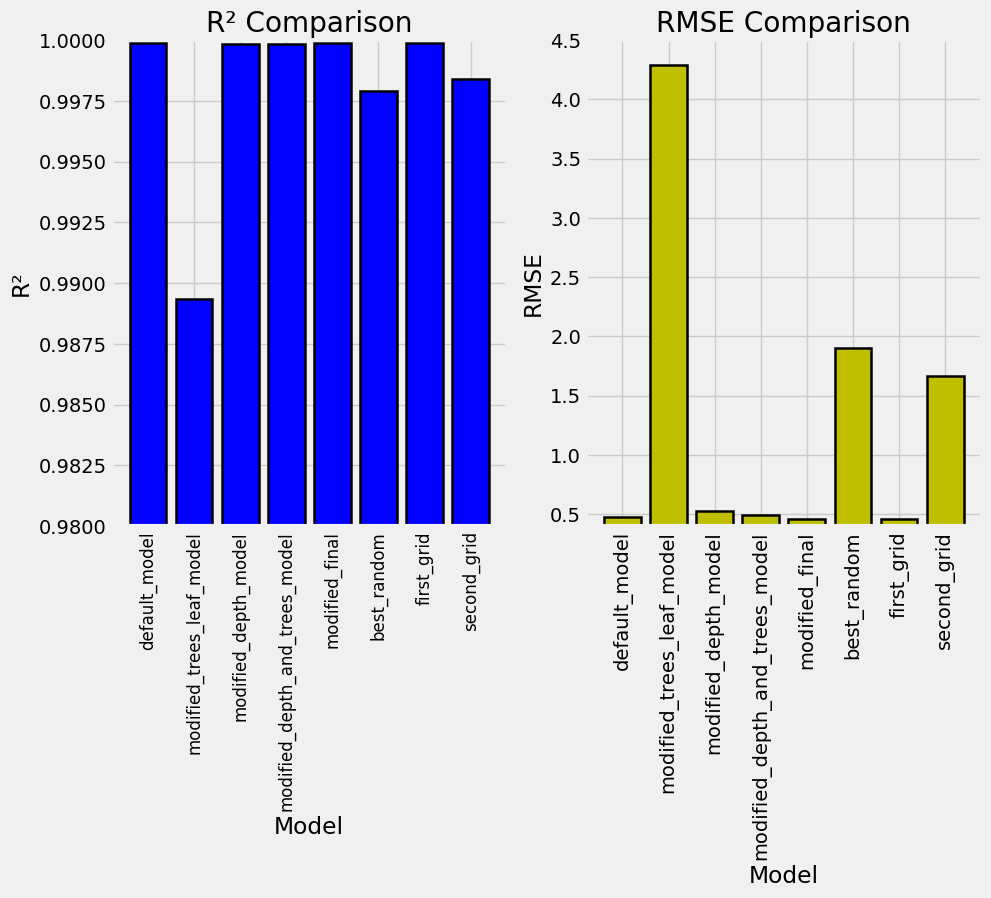

In [ ]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['R²'], color = 'b', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 90, fontsize = 12)
plt.ylim(ymin = 0.98, ymax = 1)
plt.xlabel('Model'); plt.ylabel('R²'); plt.title('R² Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['RMSE'], color = 'y', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 90)
plt.ylim(ymin = 0.4, ymax = 4.5)
plt.xlabel('Model'); plt.ylabel('RMSE'); plt.title('RMSE Comparison');

plt.show();

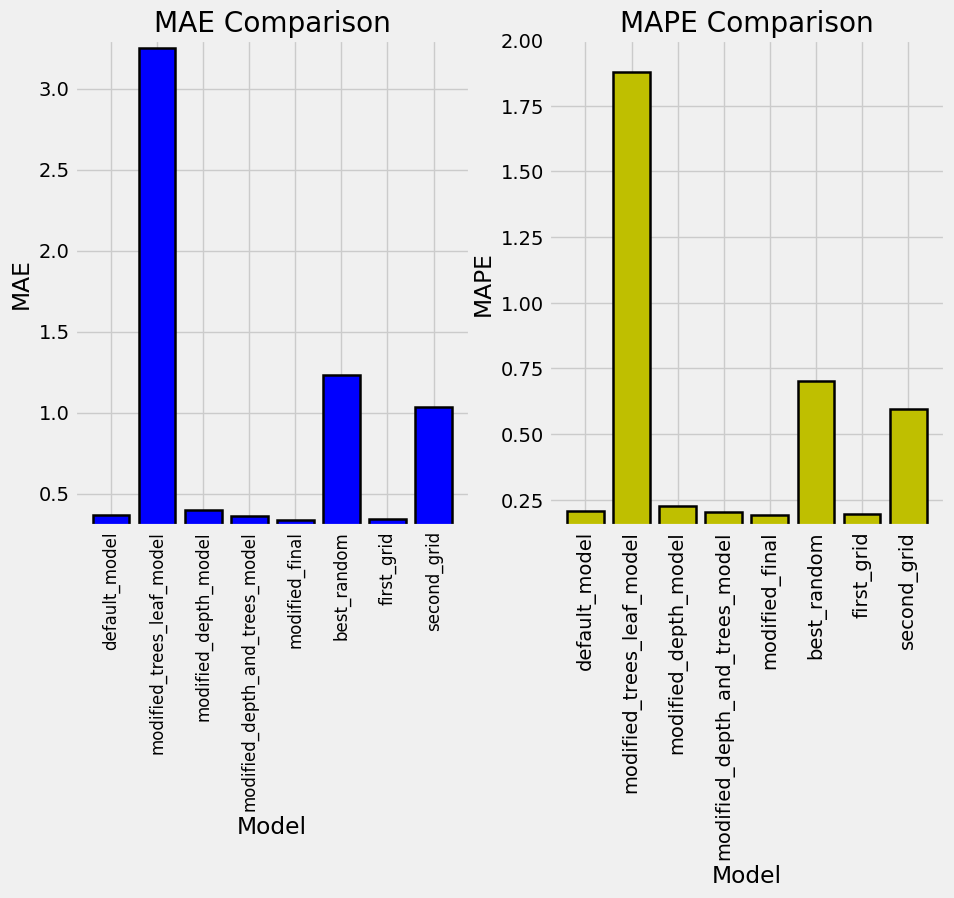

In [ ]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['MAE'], color = 'b', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 90, fontsize = 12)
plt.ylim(ymin = 0.3, ymax = 3.3)
plt.xlabel('Model'); plt.ylabel('MAE'); plt.title('MAE Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['MAPE'], color = 'y', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 90)
plt.ylim(ymin = 0.15, ymax = 2)
plt.xlabel('Model'); plt.ylabel('MAPE'); plt.title('MAPE Comparison');

plt.show();

# Gráfica valores reales vs predichos

In [ ]:
preds = np.stack([t.predict(X_val) for t in final_model.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [ ]:
#Comparing our model’s results against the validation set, here is the row of predictions, the mean of the predictions
#and the actual value from validation set.

print("0th Row for prediction from all trees:")
print(preds[:,0])
print("\nMean of the predictions:")
print(np.mean(preds[:,0]) )
print("\nActual value:")
print(y_val[0])

0th Row for prediction from all trees:
[302.9        299.84       303.22       302.5        302.5
 302.9        302.5        302.5        302.5        302.5
 300.01       302.865      301.27       302.9        302.5
 302.795      302.76       302.83       300.01       302.41
 302.5        302.5        302.5        302.5        302.5
 302.5        302.41       300.01       302.5        302.865
 302.9        302.5        302.5        302.         301.73
 301.27       302.5        302.5        302.5        302.5
 302.83       302.5        301.27       302.9        302.9
 302.76       302.76       302.76       302.5        302.
 302.5        299.88       300.95       299.88       302.455
 302.5        302.5        302.41       301.73       302.5
 302.5        302.9        302.5        302.5        302.5
 302.41       302.76       302.41       302.5        302.5
 302.5        302.5        302.5        302.5        303.22
 302.5        302.5        303.22       302.5        302.41
 303.22   

In [ ]:
rf_test_pred_final = final_model.predict(X_val)
rf_prediction_values = pd.DataFrame({'Precio de Cierre Real':y_val,'Precio de Cierre Previsto':rf_test_pred_final})
rf_prediction_values.tail(10)

,Precio de Cierre Real,Precio de Cierre Previsto
timestamp,,
4/6/2020,171.49,171.020107
4/7/2020,164.70,164.798411
4/8/2020,173.48,173.804705
4/9/2020,171.16,171.122821
4/10/2020,158.26,158.549321
4/11/2020,158.66,158.712786
4/12/2020,158.56,158.774500
4/13/2020,156.97,157.373143
4/14/2020,158.61,158.723679


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '2/26/2020'),
  Text(0.0, 0, '7/3/2019'),
  Text(50.0, 0, '8/22/2019'),
  Text(100.0, 0, '10/11/2019'),
  Text(150.0, 0, '11/30/2019'),
  Text(200.0, 0, '1/19/2020'),
  Text(250.0, 0, '3/9/2020'),
  Text(300.0, 0, ''),
  Text(350.0, 0, '')])

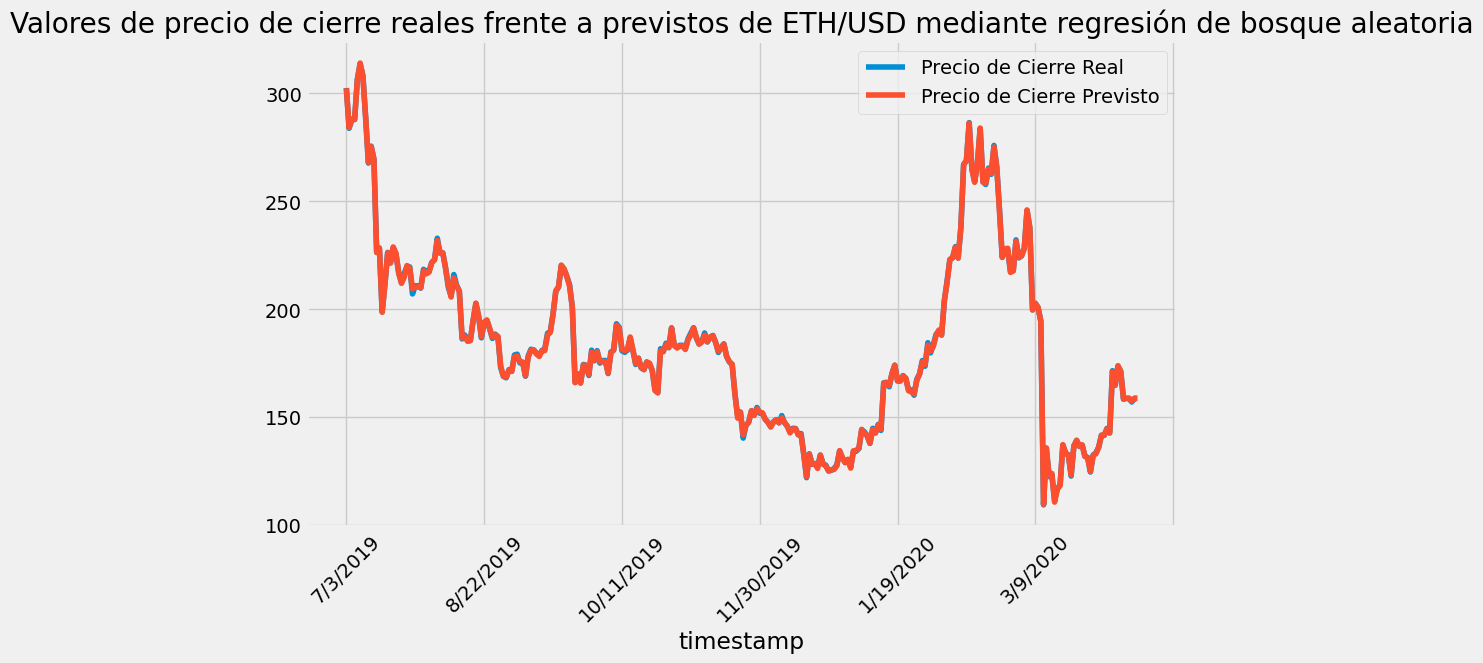

In [ ]:
rf_prediction_values[['Precio de Cierre Real','Precio de Cierre Previsto']].plot(figsize = (10,6))
plt.title('Valores de precio de cierre reales frente a previstos de ETH/USD mediante regresión de bosque aleatoria')
plt.xticks(rotation=45)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(-2.5, 0, ''),
  Text(0.0, 0, '7/3/2019'),
  Text(2.5, 0, ''),
  Text(5.0, 0, '7/8/2019'),
  Text(7.5, 0, ''),
  Text(10.0, 0, '7/13/2019'),
  Text(12.5, 0, ''),
  Text(15.0, 0, '7/18/2019'),
  Text(17.5, 0, ''),
  Text(20.0, 0, '')])

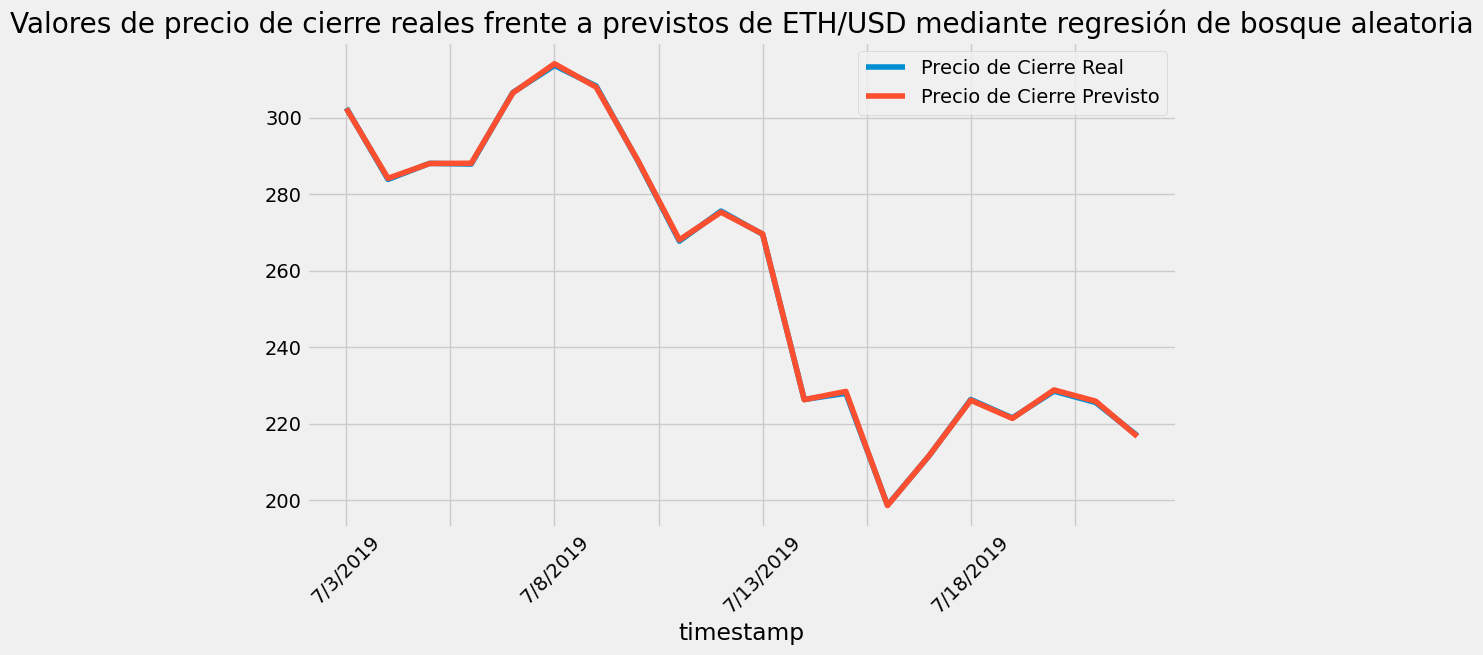

In [ ]:
rf_prediction_values.head(20)[['Precio de Cierre Real','Precio de Cierre Previsto']].plot(figsize = (10,6))
plt.title('Valores de precio de cierre reales frente a previstos de ETH/USD mediante regresión de bosque aleatoria')
plt.xticks(rotation=45)

# Importancia de las variables

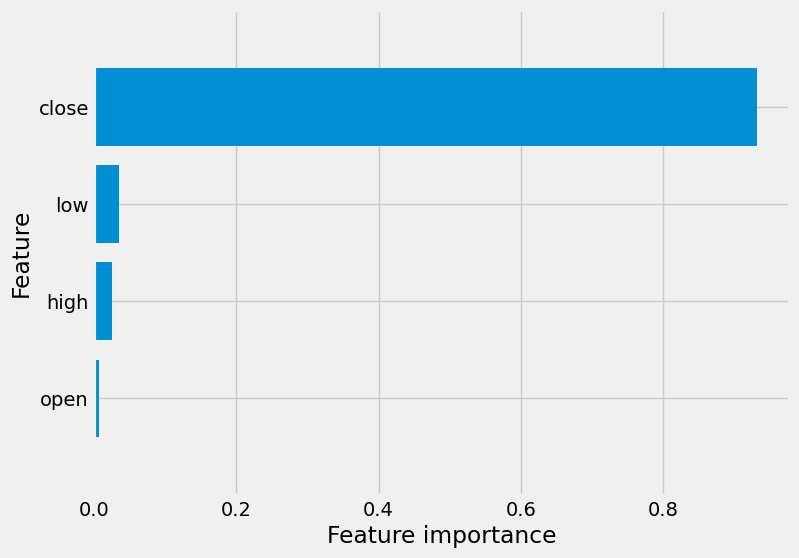

In [ ]:
def plot_feature_importances_features(final_model):
    plt.figure(figsize=(8,6))
    n_features = 4
    plt.barh(range(n_features), final_model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_features(final_model)
plt.savefig('feature_importance')

In [ ]:
for feature in zip(features, final_model.feature_importances_):
    print(feature)

('open', 0.007497101452403145)
('high', 0.02570864679828482)
('low', 0.03553754826743362)
('close', 0.9312567034818784)


# Representación de árboles de RF



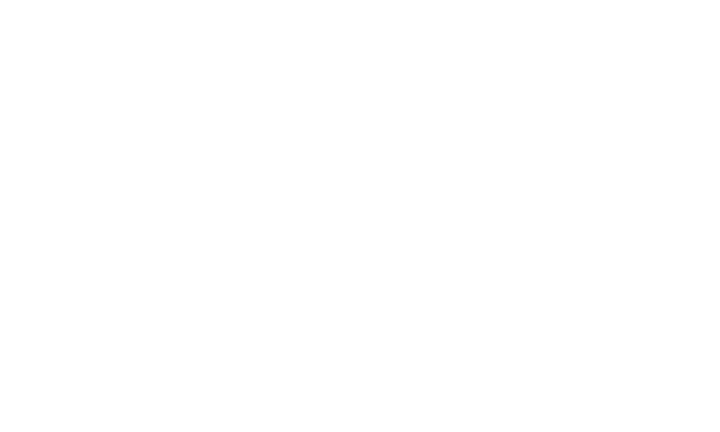

In [ ]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))


draw_tree(final_model.estimators_[0], X_train, precision=3)

# Crypto Direction

In [ ]:
df_col = pd.concat([X_val['close'],rf_prediction_values], axis=1)
df_col

,close,Precio de Cierre Real,Precio de Cierre Previsto
timestamp,,,
7/3/2019,302.53,302.53,302.403235
7/4/2019,283.86,283.86,284.144554
7/5/2019,288.05,288.05,288.020482
7/6/2019,287.87,287.87,288.088268
7/7/2019,306.58,306.58,306.471964
...,...,...,...
4/11/2020,158.66,158.66,158.712786
4/12/2020,158.56,158.56,158.774500
4/13/2020,156.97,156.97,157.373143
